In [ ]:
import os, json
import pandas as pd
import numpy as np
import glob, json

In [287]:
json_dir = './app/data'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
    dfs.append(json_data)
df = pd.concat(dfs)

In [ ]:
df.info()

In [ ]:
df.head()

In [288]:
del df['authorDisplayName']
del df['authorProfileImageUrl']
del df['authorChannelUrl']
del df['canRate']
del df['viewerRating']
del df['moderationStatus']
del df['authorChannelId']

In [289]:
del df['authorChannelId.value']

In [290]:
del df['updatedAt']

In [291]:
del df['textDisplay']

In [ ]:
df.head(8)

In [59]:
df['likeCount'].describe()

count    38988.000000
mean        10.527957
std        168.191436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      14273.000000
Name: likeCount, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
values = df['likeCount'].value_counts()

In [ ]:
high_values = values[values.index > 10].sum()

In [ ]:
x = values[values.index <= 10]

Text(0, 0.5, 'Count')

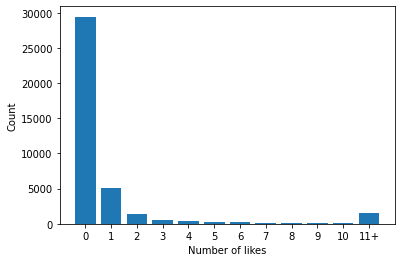

In [61]:
xlabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11+']
yvalues = x.values
plt.bar(xlabels, yvalues)
plt.xlabel('Number of likes')
plt.ylabel('Count')

In [189]:
def word_count_plot(texts):
    a = np.empty(texts.shape)
    i = 0
    for data in texts:
        word_count = len(data.split())
        a[i] = word_count
        i+=1

    fig, ax = plt.subplots()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    fig.set_figwidth(40)
    fig.set_figheight(20)
    freq, bins, patches = ax.hist(a, bins=np.arange(0, 51), edgecolor = 'black', )
    bin_centers = np.diff(bins)*0.5 + bins[:-1]

    ax.set_xticks(bins)
    ax.set_xlabel("Number of words", fontsize=25)
    ax.set_ylabel("Count", fontsize=25)

    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        plt.annotate("{}".format(height),
                    xy = (x, height+10),
                    xytext = (0,0.2),
                    textcoords = "offset points", 
                    ha = 'center', va = 'bottom', fontsize=15
                    )
        n = n+1

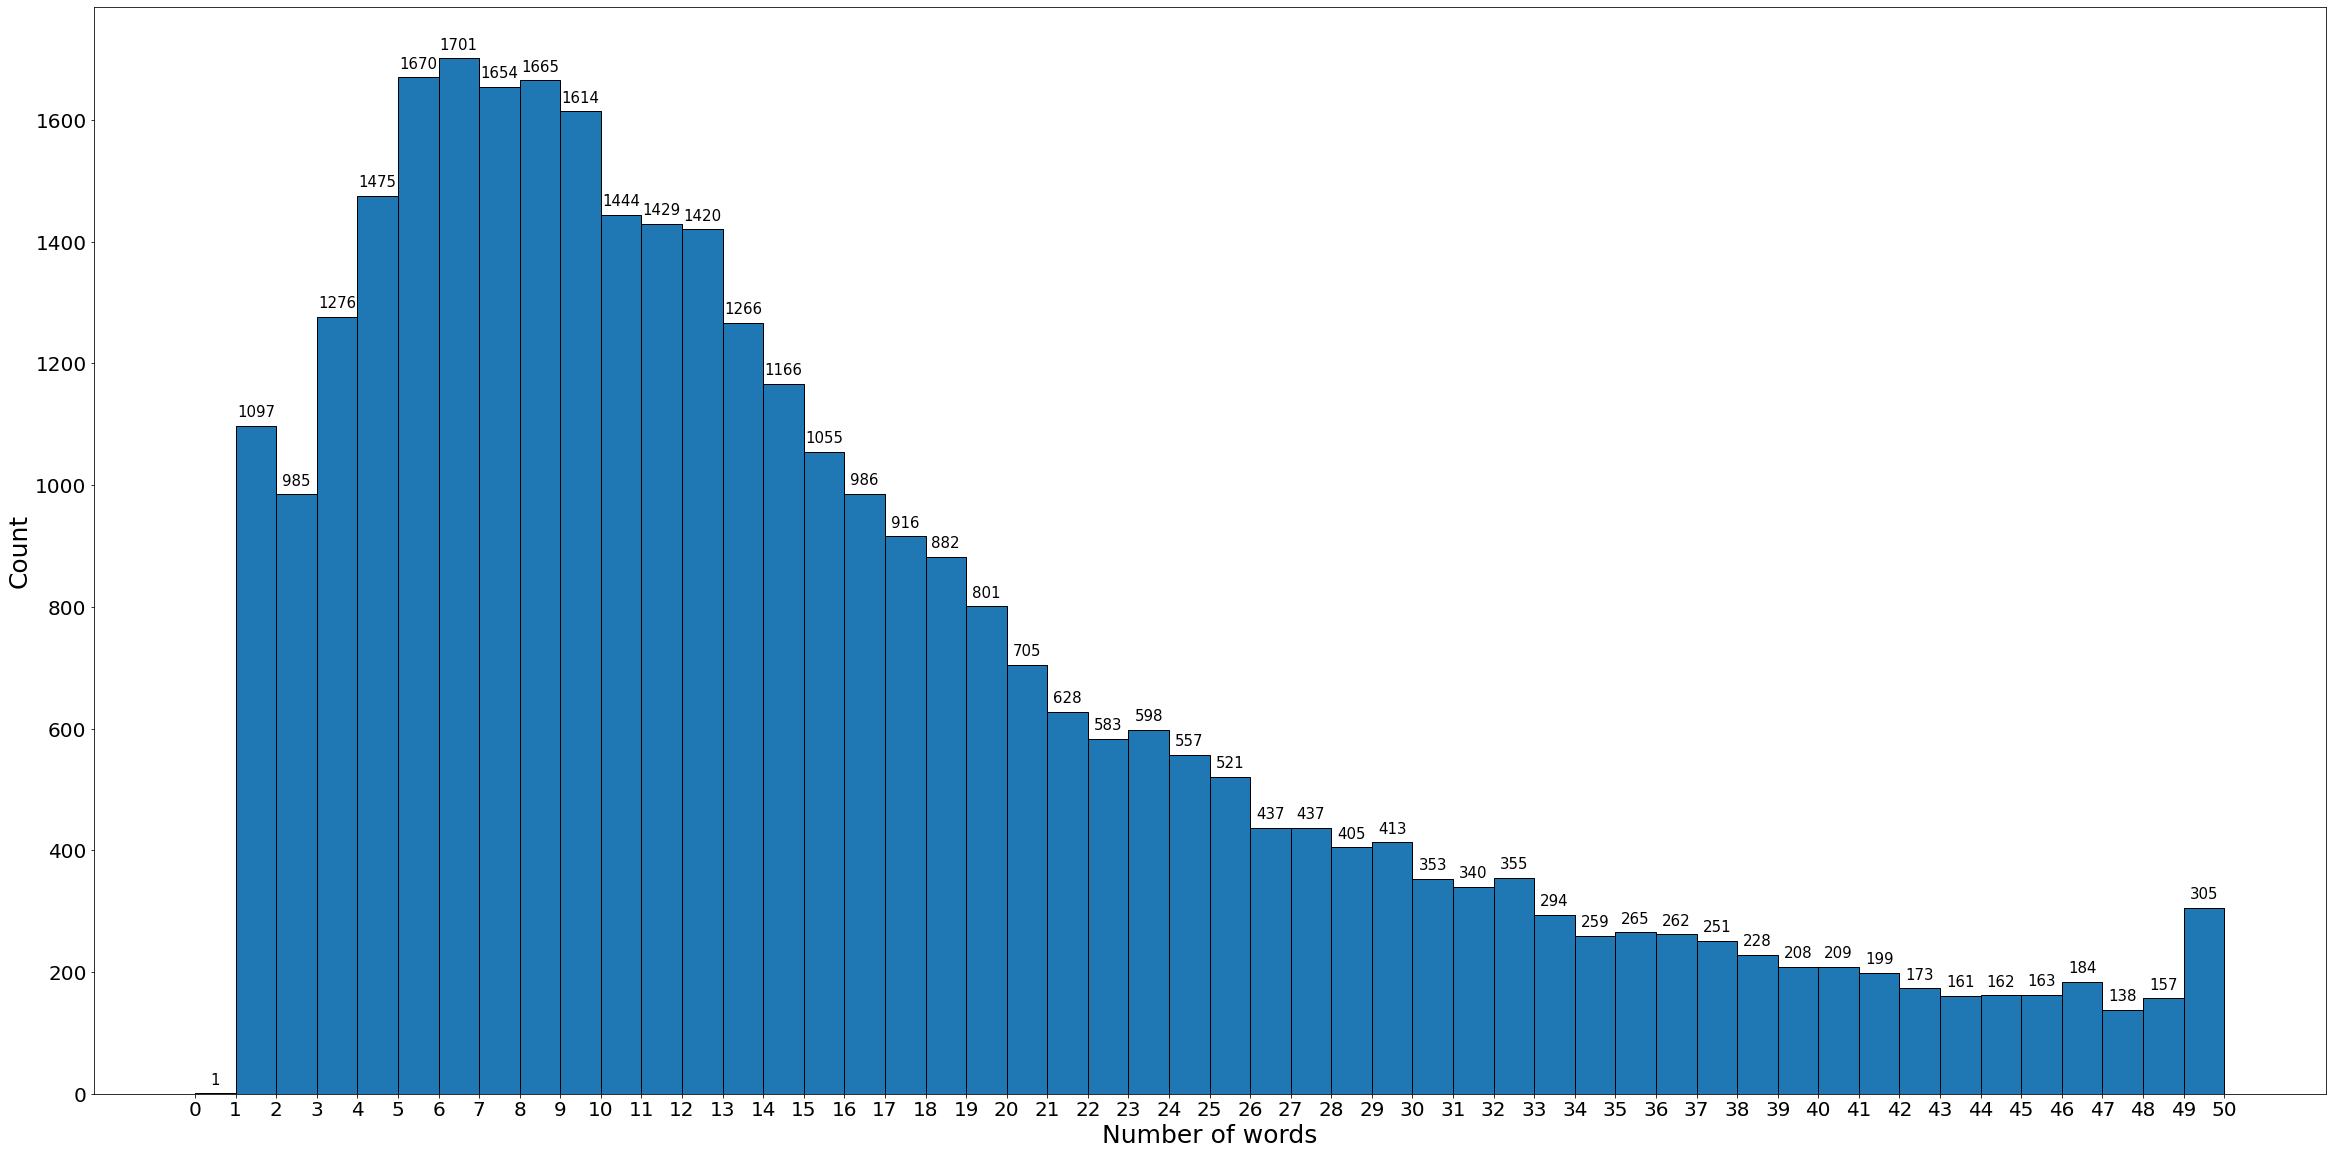

In [190]:
word_count_plot(df["textOriginal"])

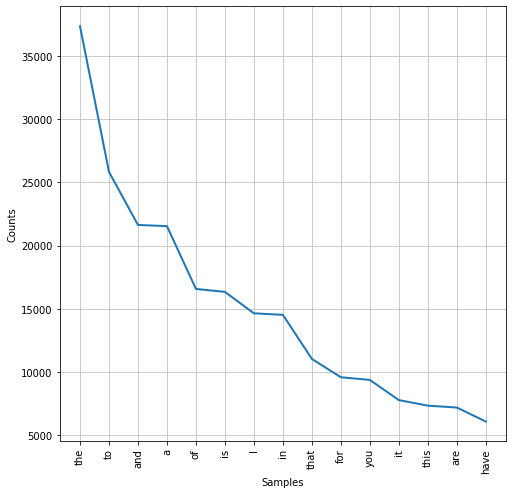

In [198]:
import nltk
words = []
for text in df['textOriginal']:
    for word in text.split():
        words.append(word)

plt.figure(figsize=(8,8))
words_plot = nltk.FreqDist(words)
ax = words_plot.plot(15)

In [110]:
import emoji
import regex

def split_count(texts):
    emoji_counter = 0
    for text in texts:
        data = regex.findall(r'\X', text)
        for word in data: 
            if emoji.is_emoji(word):
                emoji_counter += 1

    return emoji_counter

In [113]:
split_count(df["textOriginal"].values)

7366

In [115]:
import datetime
def parse_date(text):
    dateText = text.split('T')[0]
    return datetime.datetime.strptime(dateText, "%Y-%m-%d").date()

In [116]:
df["date"] = df["publishedAt"].apply(parse_date)

In [148]:
df_groupped = df.groupby("videoId")

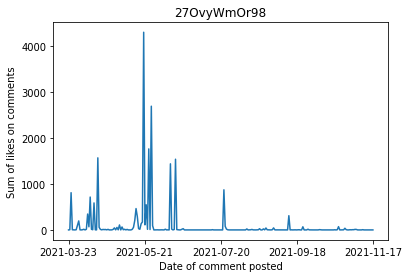

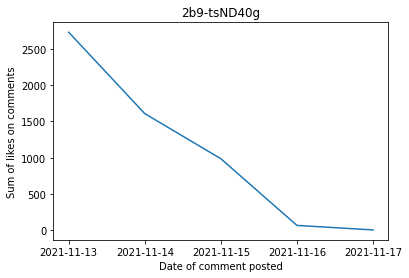

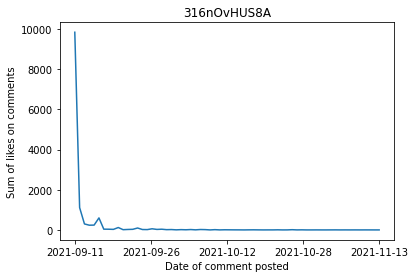

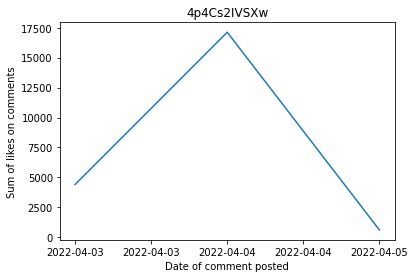

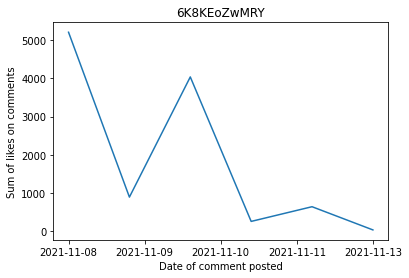

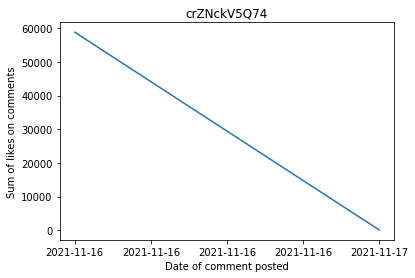

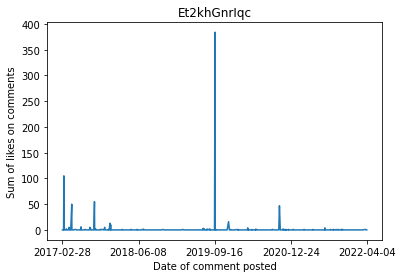

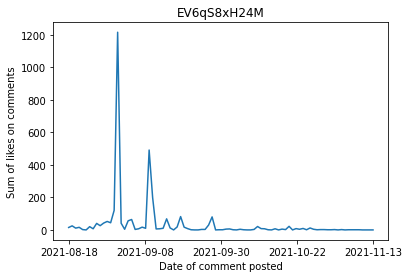

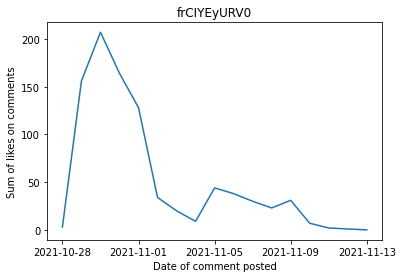

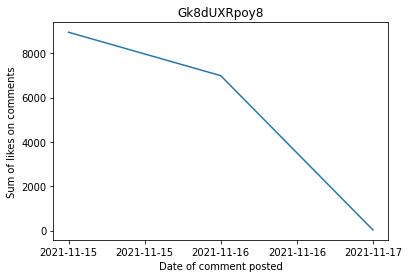

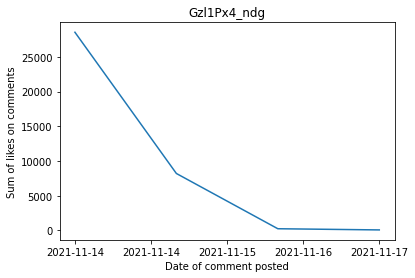

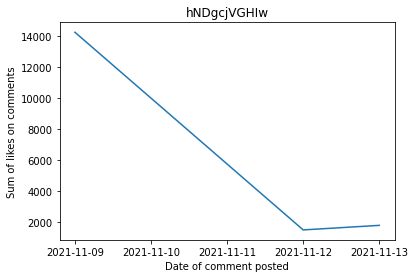

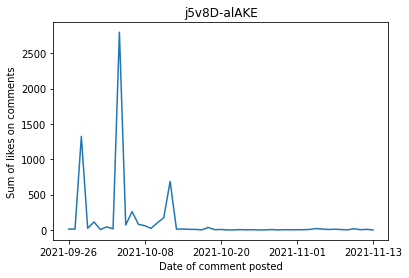

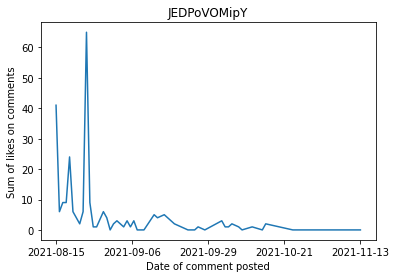

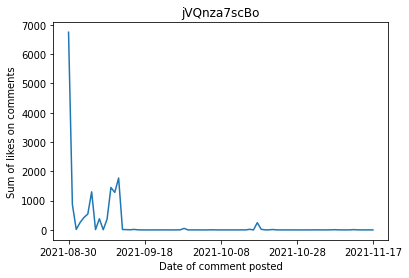

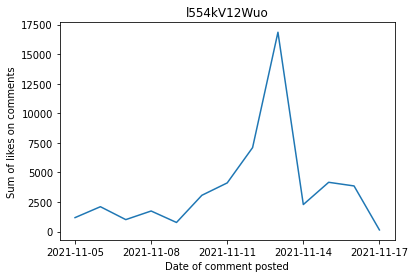

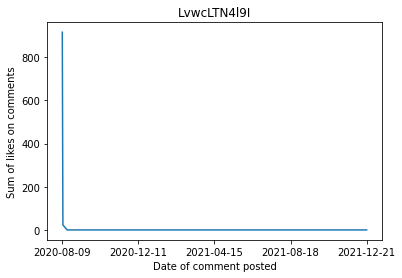

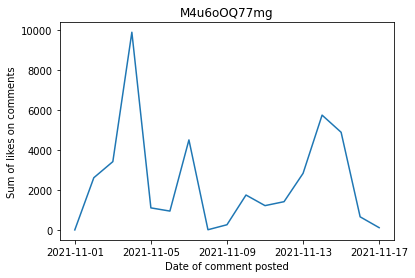

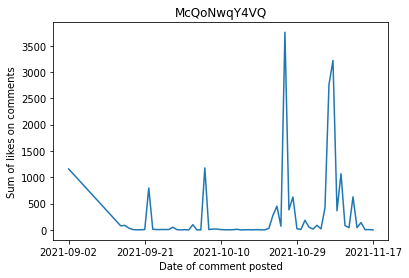

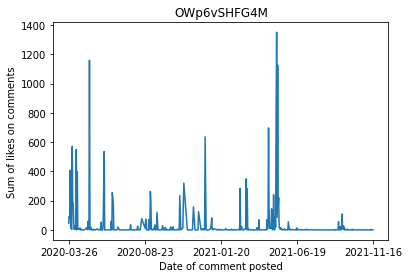

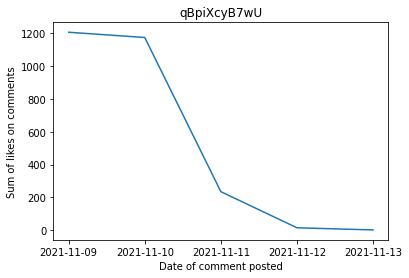

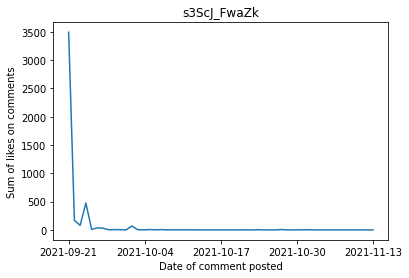

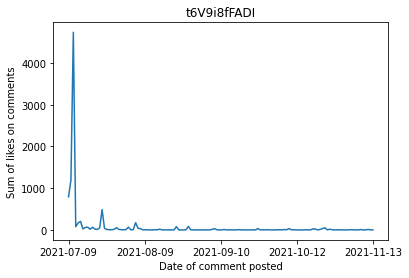

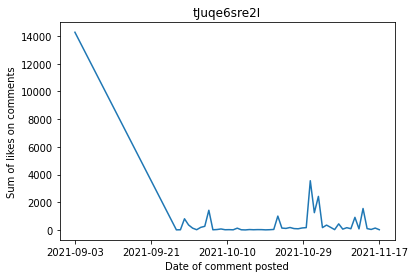

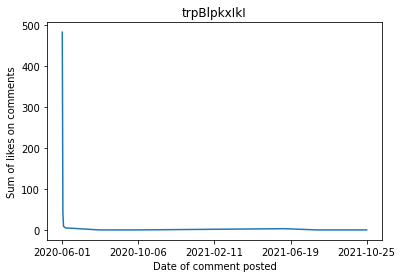

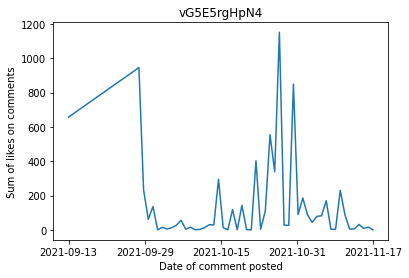

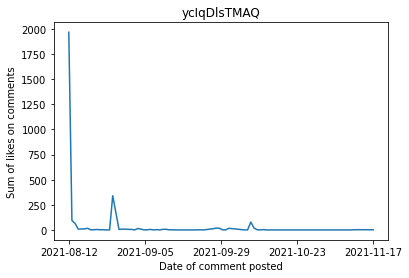

In [182]:
for videoId in df["videoId"].unique():
    group = df_groupped.get_group(videoId)
    plt.figure()
    date_group = group.groupby("date")
    date_group.likeCount.sum().plot(xticks=pd.date_range(date_group.date.min().min(), date_group.date.max().max(), periods=5), xlabel="Date of comment posted", ylabel = "Sum of likes on comments", title=videoId)
    plt.show()
    


In [209]:
from nltk import word_tokenize, sent_tokenize, pos_tag

In [292]:
df['textOriginal'] = df["textOriginal"].str.lower()
df['textCleaned'] = df["textOriginal"].apply(clean_accented_chars)
df['textCleaned'] = df["textCleaned"].apply(clean_punctuation)
df['sentences'] = df['textCleaned'].apply(sent_tokenize)
df['words'] = df['textCleaned'].apply(word_tokenize)
del df['textCleaned']

In [270]:
test = nlp("b4")
for token in test:
    print(token.lemma_)

b4


In [229]:
def remove_adjectives_adverbs_verbs(text):
        return ' '.join(word.text for word in nlp(text) if not (word.pos_ == 'VERB' or word.pos_ == 'ADJ' or word.pos_ == 'ADV'))

In [230]:
remove_adjectives_adverbs_verbs(df['sentences'].values[0][0])

'for you   the dream will because I a product and a attitude luck'

In [228]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(df['sentences'].values[0][0])
displacy.render(doc, style="dep")

False
True
True
True
True
True
True
False
True
True
False
True
False
True
True
True
False
True
False
True


In [216]:
STOPWORDS = nlp.Defaults.stop_words
len(STOPWORDS)

326

In [245]:
def remove_stopwords(tokens):
    return [token for token in tokens if not token in STOPWORDS and len(token) > 1]

In [255]:
import unidecode
def clean_accented_chars(text):
    text = unidecode.unidecode(text)
    return text

In [254]:
import re
def clean_punctuation(text):
    text = re.sub(r'\d+', '', text)
    text = str(text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [285]:
df.head()

,videoId,textOriginal,likeCount,publishedAt,sentences,words
0,27OvyWmOr98,Good for you the dream will happen because I ...,0,2021-11-17T00:41:53Z,[good for you the dream will happen because i...,"[good, for, you, the, dream, will, happen, bec..."
1,27OvyWmOr98,Here's how you harvest sorrel and make it from...,0,2021-11-16T22:54:34Z,[heres how you harvest sorrel and make it from...,"[heres, how, you, harvest, sorrel, and, make, ..."
2,27OvyWmOr98,IRS has entered the chat,0,2021-11-16T20:31:38Z,[irs has entered the chat],"[irs, has, entered, the, chat]"
3,27OvyWmOr98,Anybody from the hood knows exactly what that ...,0,2021-11-15T23:49:49Z,[anybody from the hood knows exactly what that...,"[anybody, from, the, hood, knows, exactly, wha..."
4,27OvyWmOr98,Question? Is it legal to mix a nationally reco...,0,2021-11-15T20:00:20Z,[question is it legal to mix a nationally reco...,"[question, is, it, legal, to, mix, a, national..."


In [258]:

df['words'] = df['words'].apply(remove_stopwords)

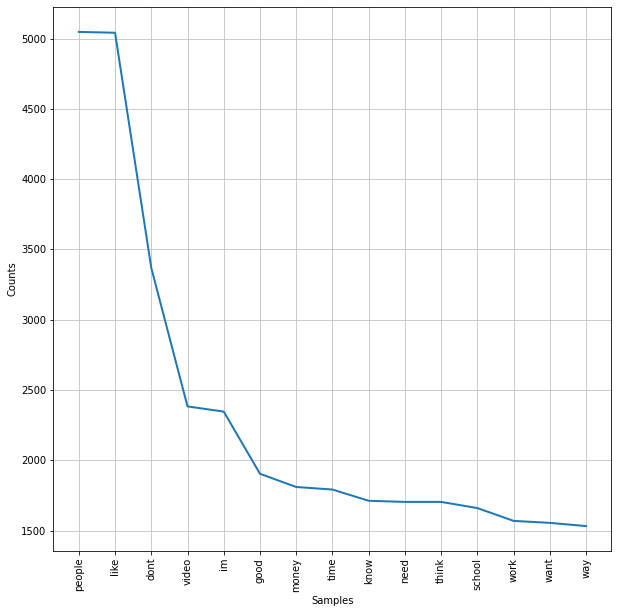

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [260]:
words = []
for tokens in df['words']:
    for token in tokens:
        words.append(token)

plt.figure(figsize=(10,10))
words_plot = nltk.FreqDist(words)
words_plot.plot(15)

In [264]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [269]:
words = ["connection", "saved", "cars", "linguistics", "scientific", "study", "included", "analysis"]
print("Word - Stem")
print("-----------")
for word in words:
    print(word + " - " + ps.stem(word))

Word - Stem
-----------
connection - connect
saved - save
cars - car
linguistics - linguist
scientific - scientif
study - studi
included - includ
analysis - analysi


In [268]:
words = []
print("Word - Stem")
print("-----------")
for word in words:
    print(word + " - " + ps.stem(word))
    

Word - Stem
-----------
scientific - scientif
study - studi
included - includ
analysis - analysi


In [293]:
df.head()

,videoId,textOriginal,likeCount,publishedAt,sentences,words
0,27OvyWmOr98,good for you the dream will happen because i ...,0,2021-11-17T00:41:53Z,[good for you the dream will happen because i...,"[good, for, you, the, dream, will, happen, bec..."
1,27OvyWmOr98,here's how you harvest sorrel and make it from...,0,2021-11-16T22:54:34Z,[heres how you harvest sorrel and make it from...,"[heres, how, you, harvest, sorrel, and, make, ..."
2,27OvyWmOr98,irs has entered the chat,0,2021-11-16T20:31:38Z,[irs has entered the chat],"[irs, has, entered, the, chat]"
3,27OvyWmOr98,anybody from the hood knows exactly what that ...,0,2021-11-15T23:49:49Z,[anybody from the hood knows exactly what that...,"[anybody, from, the, hood, knows, exactly, wha..."
4,27OvyWmOr98,question? is it legal to mix a nationally reco...,0,2021-11-15T20:00:20Z,[question is it legal to mix a nationally reco...,"[question, is, it, legal, to, mix, a, national..."


In [294]:
x_words = []
for text in df["textOriginal"]:
        doc = nlp(text)
        for token in doc:
            if token.pos_ == "X":
                x_words.append(token.text)

c:\Users\czove\Desktop\thesis\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\czove\Desktop\thesis\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\czove\Desktop\thesis\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\czove\Desktop\thesis\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128125 (\N{EXTRATERRESTRIAL ALIEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


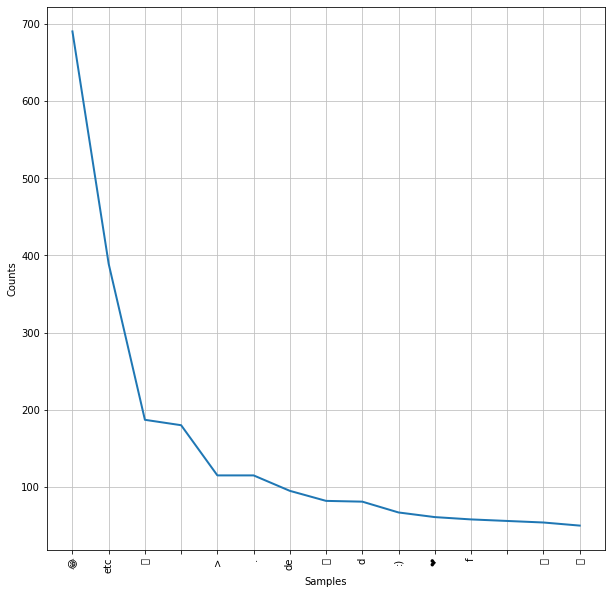

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [295]:
plt.figure(figsize=(10,10))
words_plot = nltk.FreqDist(x_words)
words_plot.plot(15)

In [300]:
words = ["connection", "cars", "included", "analysis", "bought", "came", "spoke", "wrote"]
print("Word - Stem")
print("-----------")
for word in words:
    doc = nlp(word)
    for token in doc:
        print(token.text + " - " + token.lemma_)

Word - Stem
-----------
connection - connection
cars - car
included - include
analysis - analysis
bought - buy
came - come
spoke - speak
wrote - write


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

In [27]:
sid_obj = SentimentIntensityAnalyzer()
def score_sentiment(sentences):
    compounds = []
    intensities = []
    for sentence in sentences:
        sentiment_dict = sid_obj.polarity_scores(sentence)
        if sentiment_dict['compound'] >= 0.05 :
            intensities.append(sentiment_dict["pos"])
        elif sentiment_dict['compound'] <= - 0.05 :
            intensities.append(sentiment_dict["neg"])
        compounds.append(sentiment_dict['compound'])

    comment_compound = np.average(compounds)
    intesity_average = np.average(intensities)
    
    if comment_compound >= 0.05:
        sentiment = "Positive"
    elif comment_compound <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    if np.isnan(intesity_average):
        intesity_average = 0.0
    
    return sentiment,comment_compound ,intesity_average, compounds, intensities

In [16]:
sentences = ["VADER is smart, handsome, and funny!", "The book was good.", "At least it isn't a horrible book.", "Today SUX!"]

for sentence in sentences:
    dict = sid_obj.polarity_scores(sentence)
    print("Sentence: "+sentence)
    print("Positive intensity: "+ str(dict['pos']) + ", Neutral intensity: " + str(dict['neu']) + ", Negative intensity: "+ str(dict['neg']) + ", Sentiment score: "+ str(dict['compound']) )
    print("---")

Sentence: VADER is smart, handsome, and funny!
Positive intensity: 0.752, Neutral intensity: 0.248, Negative intensity: 0.0, Sentiment score: 0.8439
---
Sentence: The book was good.
Positive intensity: 0.492, Neutral intensity: 0.508, Negative intensity: 0.0, Sentiment score: 0.4404
---
Sentence: At least it isn't a horrible book.
Positive intensity: 0.322, Neutral intensity: 0.678, Negative intensity: 0.0, Sentiment score: 0.431
---
Sentence: Today SUX!
Positive intensity: 0.0, Neutral intensity: 0.221, Negative intensity: 0.779, Sentiment score: -0.5461
---


In [33]:
comment = ['Yeah this album is just solid.',
 'Doesnt touch the soul albums of the early 70s though.',
 'Also fuck the autotune on the backing vocals all over this album']
overall_sentiment, overall_sentiment_score, intensity, sentence_scores, sentence_intesities = score_sentiment(comment)

In [40]:
print("Comment: '" + ' '.join(comment) + "'")
print("Overall sentiment score: " + str(overall_sentiment_score))
print("Overall sentiment: " + overall_sentiment)
print("Intensity: " + str(intensity))
print("Sentence sentiment scores: " + str(sentence_scores))

Comment: 'Yeah this album is just solid. Doesnt touch the soul albums of the early 70s though. Also fuck the autotune on the backing vocals all over this album'
Overall sentiment score: -0.035066666666666656
Overall sentiment: Neutral
Intensity: 0.3635
Sentence sentiment scores: [0.4215, 0.0, -0.5267]
